In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]
rcParams.update({'font.size': 18})

(-0.5, 1427.5, 1587.5, -0.5)

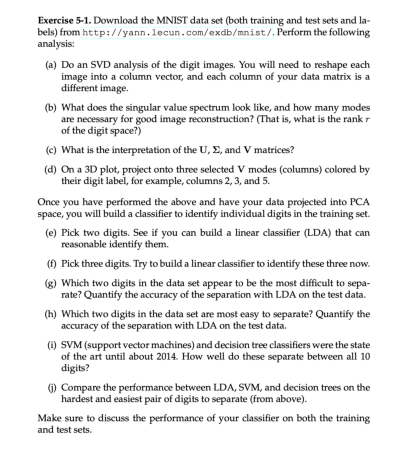

In [2]:
A = imread('5.1.png')
plt.imshow(A)
plt.axis('off')

In [3]:
import idx2numpy

In [4]:
train_images= idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
print(train_images.shape)
print(train_labels.shape)
train_images = train_images.reshape(60000, 784)

(60000, 28, 28)
(60000,)


In [5]:
train_images = np.transpose(train_images)

In [6]:
print(train_images.shape)

(784, 60000)


## Interpretation of U, S, VT

In [ ]:
U, S, VT = np.linalg.svd(train_images[:, 0:30000])

In [ ]:
plt.figure()
plt.plot(S, marker='o', linestyle='-')
plt.title("Singular Value Spectrum")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value Magnitude")
plt.grid(True)
plt.show()

Considering the singular value spectrum, the elbow is at approximately 100. So, we can say, 100 modes are required for good reconstruction of digits

In [ ]:
a = U[:, 57] # Replace 57 with any number between 0 and 783 to get the corresponding basis vector for digit construction in decreasing order of importance
a = a.reshape(28,28)
plt.imshow(a, cmap='gray')
plt.axis('off')

In [ ]:
b = S 
b = b.reshape(28,28)
plt.imshow(b, cmap = 'gray')
plt.axis('off')

The above image corresponds to the importance associated with the corresponding basis vector in U

In [ ]:
c = VT[0]
c = c.reshape(100, 300)
plt.imshow(c, cmap = 'gray')
plt.axis('off')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
V_modes = VT[[2, 3, 5], :]
V_modes = np.transpose(V_modes)

In [ ]:
projection = np.dot(train_images[:, 0:30000],V_modes ) 
labels = train_labels[0:30000]
projection1 = projection[:,0].reshape(28,28)
projection2 = projection[:,1].reshape(28,28)
projection3 = projection[:,2].reshape(28,28)

In [ ]:
nx, ny = 28, 28
x = range(nx)
y = range(ny)


hf = plt.figure(figsize =(10, 20))
ha = hf.add_subplot(311, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, projection1, color = 'c')
ha.set_title("Digit" + str(labels[2]))
hb = hf.add_subplot(312, projection='3d')

hb.plot_surface(X, Y, projection2, color = 'm')
hb.set_title("Digit" + str(labels[3]))
hc = hf.add_subplot(313, projection='3d')

hc.plot_surface(X, Y, projection3, color = 'b')
hc.set_title("Digit" + str(labels[5]))
plt.show()

## Part 2

In [7]:
test_images= idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

test_images = test_images.reshape(10000, 784)
test_images = np.transpose(test_images)
# Find the indices of data points corresponding to the selected digits
# indices_test =np.where(np.isin(test_labels, selected_digits))
# test_data = test_images[:,indices_test].reshape(784, 1924)
# test_labels = labels[indices_test]
# test_data = np.transpose(test_data)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
def accuracy(selected_digits, train_images, train_labels, test_images, test_labels):
    indices_selected =np.where(np.isin(train_labels, selected_digits))
    selected_data = train_images[:,indices_selected]
    selected_labels = train_labels[indices_selected]
    selected_data = selected_data.reshape(784,selected_data.shape[2])
    selected_data = np.transpose(selected_data)
    indices_test =np.where(np.isin(test_labels, selected_digits))
    test_data = test_images[:,indices_test]
    test_data = test_data.reshape(784,test_data.shape[2])
    test_labels = test_labels[indices_test]
    test_data = np.transpose(test_data)
    
    lda = LinearDiscriminantAnalysis()

# train LDA model on training data
    lda.fit(selected_data, selected_labels)
# make predictions on testing data
    y_pred = lda.predict(test_data)
# calculate accuracy score
    accuracy = accuracy_score(test_labels, y_pred)
# print accuracy score
    print("Accuracy on test data: {:.2f}%".format(accuracy*100))
    
    # make predictions on testing data
    y_pred = lda.predict(selected_data)
# calculate accuracy score
    accuracy1 = accuracy_score(selected_labels, y_pred)
# print accuracy score
    print("Accuracy on Train Data: {:.2f}%".format(accuracy1*100))
    
    return accuracy, accuracy1

## Picking 2 and 5 and apply LDA

In [10]:
selected_digits = [2, 5]
accuracy(selected_digits, train_images, train_labels, test_images, test_labels)

Accuracy on test data: 98.08%
Accuracy on Train Data: 98.20%


(0.9807692307692307, 0.9819843571491343)

## Picking 2, 5, 9 and apply LDA

In [11]:
selected_digits = [2, 5, 9]
accuracy(selected_digits, train_images, train_labels, test_images, test_labels)

Accuracy on test data: 96.45%
Accuracy on Train Data: 96.91%


(0.9645414251619502, 0.969067405355494)

## Comparing accuracy among digits

In [ ]:
ans = np.zeros((10,10))
ans1 = np.zeros((10,10))
for i in range(10):
    for j in range(i+1, 10):
        selected_digits = [i,j]
        print("Accuracy between " + str(i) + " and " + str(j))
        ans[i,j], ans1[i,j]= accuracy(selected_digits, train_images, train_labels, test_images, test_labels)


In [ ]:
print(ans)

In [ ]:
matrix = np.transpose(ans)+ans + np.eye(10, dtype=int)

In [ ]:
np.max(ans)

In [ ]:
np.min(matrix)

In [ ]:
min_index = np.argmin(matrix)  # Find the index of the minimum value

# If you want to get the row and column indices of the minimum value
row_index, col_index = np.unravel_index(min_index, matrix.shape)


In [ ]:
print(row_index, col_index)

### 5 and 8 have less accuracy implying it is not easy to seperate them 

In [ ]:
max_index = np.argmax(ans)  # Find the index of the minimum value

# If you want to get the row and column indices of the minimum value
row_index, col_index = np.unravel_index(max_index, ans.shape)
print(row_index, col_index)

### 6 and 9 looks very easy to seperate

# SVM

Since, a lot of time is taken to train the SVM from 60000 data points, I took the first 30000 data points to train. 

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.transpose(train_images[:,0:30000])
y_train = train_labels[0:30000]
X_test = np.transpose(test_images)
y_test = test_labels

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=1)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can also evaluate the classifier using other metrics like confusion matrix, etc.
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.9145
Confusion Matrix:
 [[ 954    0    1    2    2   13    6    1    1    0]
 [   0 1118    5    1    0    1    2    1    7    0]
 [   6   13  937   17    5    6    7   14   26    1]
 [   2    4   29  897    1   36    1    7   25    8]
 [   1    1   10    1  933    0    6    2    4   24]
 [  15    7    6   48    7  763   11    3   27    5]
 [  10    3   15    2    8   18  902    0    0    0]
 [   1   10   17   15   12    1    0  936    0   36]
 [   6    8   29   46    7   30    7    8  826    7]
 [   7    8    3   12   47    6    1   35   11  879]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.89      0.91      0.90      1032
           3       0.86      0.89      0.87      1010
           4       0.91      0.95      0.93       982
           5       0.87      0.86      0.86       892
           6       0.96      0

# Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can also evaluate the classifier using other metrics like confusion matrix, etc.
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.8495
Confusion Matrix:
 [[ 906    2   12    2    8   17   16    5    7    5]
 [   2 1077    9   11    2    8    5    3   17    1]
 [  14   17  870   36    9   10   17   16   32   11]
 [   7    9   16  819    7   60    3   23   35   31]
 [   5    4   10   19  829   14   13    6   19   63]
 [  18    9   11   48   12  701   23   14   28   28]
 [   9    4    9   12   31   28  829    1   23   12]
 [   4   16   43   18    9    1    3  897    8   29]
 [  19   11   31   41   22   31   30   15  735   39]
 [   6    5    6   12   67   20    3   26   32  832]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       980
           1       0.93      0.95      0.94      1135
           2       0.86      0.84      0.85      1032
           3       0.80      0.81      0.81      1010
           4       0.83      0.84      0.84       982
           5       0.79      0.79      0.79       892
           6       0.88      0

For the MNIST dataset, the SVMs looks to have better accuracy on the test data set with accuracy being 91% compared to Decision trees accuracy of 85%

## Hardest Pair

In [14]:
selected_digits = [5, 8]
from sklearn.metrics import confusion_matrix, classification_report

def svm_accuracy(selected_digits, train_images, train_labels, test_images, test_labels):
    indices_selected =np.where(np.isin(train_labels, selected_digits))
    selected_data = train_images[:,indices_selected]
    selected_labels = train_labels[indices_selected]
    selected_data = selected_data.reshape(784,selected_data.shape[2])
    selected_data = np.transpose(selected_data)
    indices_test =np.where(np.isin(test_labels, selected_digits))
    test_data = test_images[:,indices_test]
    test_data = test_data.reshape(784,test_data.shape[2])
    test_labels = test_labels[indices_test]
    test_data = np.transpose(test_data)
    X_train = selected_data
    y_train = selected_labels
    X_test = test_data
    y_test = test_labels
    
    clf = svm.SVC(kernel='linear', C=1)

# Train the classifier on the training data
    clf.fit(X_train, y_train)

# Make predictions on the test data
    y_pred = clf.predict(X_test)

# Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

# You can also evaluate the classifier using other metrics like confusion matrix, etc.
    
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", report)
    

In [ ]:
svm_accuracy(selected_digits, train_images, train_labels, test_images, test_labels)

## Easiest Pair

In [ ]:
selected_digits = [6, 9]
svm_accuracy(selected_digits, train_images, train_labels, test_images, test_labels)

From all the above models, it is evident that LDA is the best classifier. And decision trees is the worst. But Decision Tree is very easy to compute using less CPU